# Exemples Intéractifs: Modulation

# $\textbf{Introduction}$

La bande de base désigne le signal d’origine contenant les informations, sans modulation par une fréquence porteuse, avec ses fréquences proches de 0 Hz. Ce type de signal est utilisé directement pour des transmissions sur des supports comme les câbles, où aucune modulation n’est nécessaire. En revanche, pour la transmission à longue distance, on convertit généralement le signal en bande de base en un signal modulé par une porteuse.

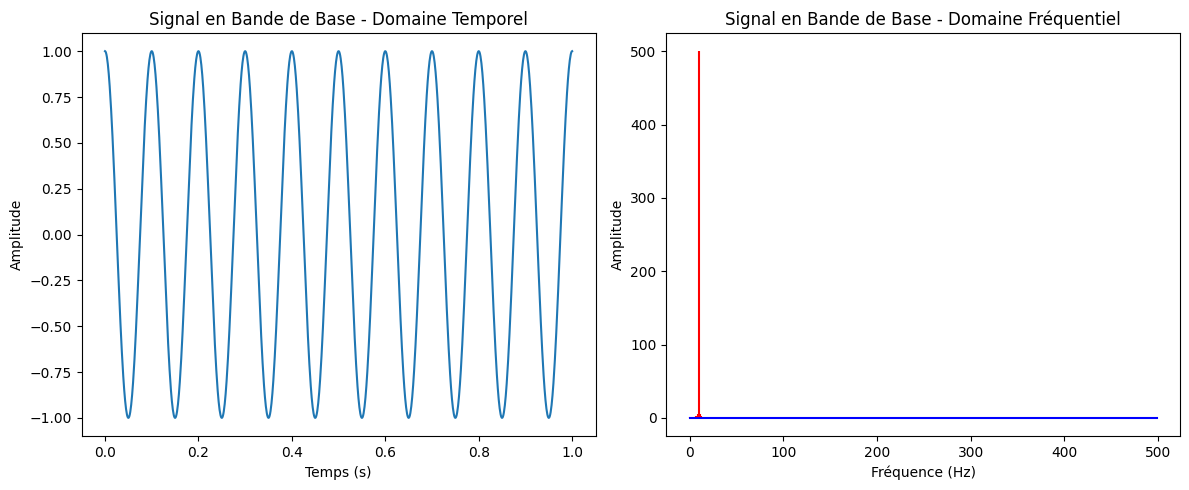

In [1]:
# Signal Bande de Base
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Paramètres
fm = 10  # fréquence du signal de message en Hz
Am = 1   # amplitude du message
t = np.linspace(0, 1, 1000)  # temps sur une seconde

# Signal en bande de base (onde sinusoïdale)
message = Am * np.cos(2 * np.pi * fm * t)

# Transformée de Fourier pour obtenir le spectre fréquentiel
message_freq = fft(message)
frequencies = fftfreq(len(t), t[1] - t[0])

# Affichage dans le domaine temporel
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t, message)
plt.title("Signal en Bande de Base - Domaine Temporel")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")

# Affichage dans le domaine fréquentiel
plt.subplot(1, 2, 2)
plt.stem(frequencies[:len(frequencies)//2], np.abs(message_freq[:len(frequencies)//2]), 'r', markerfmt=" ", basefmt="-b")
plt.title("Signal en Bande de Base - Domaine Fréquentiel")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

La modulation par porteuse consiste à utiliser une fréquence élevée (appelée porteuse) pour déplacer le spectre de fréquences d’un signal en bande de base vers une nouvelle bande, facilitant ainsi sa transmission sur de longues distances. En modulant l’un des paramètres de la porteuse (amplitude, fréquence, ou phase) en fonction du signal d’information, on obtient les principales techniques de modulation : la modulation d’amplitude (AM), la modulation de fréquence (FM) et la modulation de phase (PM).

Une **porteuse** est un signal sinusoïdal de haute fréquence qui sert de support pour transmettre un signal d’information (le message) sur une certaine distance. En modifiant l’un des paramètres de la porteuse — son amplitude, sa fréquence ou sa phase — en fonction du signal de message, on peut “transporter” l’information de manière plus efficace. Cette technique est utilisée pour faire correspondre le signal aux caractéristiques du canal de transmission (comme les ondes radio, les câbles ou la fibre optique).

Le rôle de la porteuse est de **déplacer le signal d’information** (souvent un signal basse fréquence) vers une bande de fréquences plus élevée, ce qui permet de l’émettre plus facilement et d’éviter les interférences avec d’autres signaux.

Par exemple, en radio FM, une station à 100 MHz utilise une onde sinusoïdale de 100 MHz comme porteuse. Le signal audio (le message) est ensuite modulé sur cette porteuse pour être diffusé.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Fonction pour afficher le signal modulé AM en fonction des fréquences de la porteuse et du message
def plot_am_modulated_signal(fm, fc):
    Am = 1  # amplitude du message
    Ac = 1  # amplitude de la porteuse
    t = np.linspace(0, 1, 1000)  # temps sur 1 seconde

    # Signal de message et porteuse
    message = Am * np.cos(2 * np.pi * fm * t)  # signal de message
    carrier = Ac * np.cos(2 * np.pi * fc * t)  # porteuse

    # Signal modulé en amplitude (AM)
    modulated_signal = (Ac + message) * carrier

    # Visualisation
    plt.figure(figsize=(12, 6))

    # Affichage de la porteuse
    plt.subplot(3, 1, 1)
    plt.plot(t, carrier, 'r')
    plt.title(f"Signal de Porteuse (Fréquence = {fc} Hz)")
    plt.xlabel("Temps (s)")
    plt.ylabel("Amplitude")

    # Affichage du signal de message
    plt.subplot(3, 1, 2)
    plt.plot(t, message, 'b')
    plt.title(f"Signal de Message (Fréquence = {fm} Hz)")
    plt.xlabel("Temps (s)")
    plt.ylabel("Amplitude")

    # Affichage du signal modulé AM
    plt.subplot(3, 1, 3)
    plt.plot(t, modulated_signal, 'g')
    plt.title("Signal Modulé en Amplitude (AM)")
    plt.xlabel("Temps (s)")
    plt.ylabel("Amplitude")

    plt.tight_layout()
    plt.show()

# Création des sliders pour les fréquences
interact(plot_am_modulated_signal,
         fm=FloatSlider(value=10, min=2, max=20, step=0.1, description="Fréq. Message (Hz)"),
         fc=FloatSlider(value=100, min=20, max=2000, step=1, description="Fréq. Porteuse (Hz)"));

interactive(children=(FloatSlider(value=10.0, description='Fréq. Message (Hz)', max=20.0, min=2.0), FloatSlide…

# $\textbf{Modulation d'Amplitude}$

La modulation linéaire consiste à utiliser une modulation dans laquelle le signal de message module linéairement l’amplitude d’une porteuse. Les types de modulation linéaire incluent :

## $\textbf{Modulation DSB-SC (Double Sideband Suppressed Carrier)}$

La modulation DSB-SC (Double Sideband Suppressed Carrier) est une technique de modulation où un signal message module une porteuse, mais la porteuse n'est pas transmise, réduisant ainsi la puissance inutilisée.

---

### Résultats visualisés

1. **Représentation temporelle** :
   - **Message** : Signal sinusoïdal représentant l'information à transmettre.
   - **Porteuse** : Signal de fréquence fixe servant de base pour la modulation.
   - **Signal DSB-SC** : Produit des signaux du message et de la porteuse, montrant l'enveloppe modulée.

2. **Spectre fréquentiel** :
   - Visualisation de l'énergie du signal DSB-SC dans le domaine fréquentiel.
   - Les bandes latérales autour de la fréquence de la porteuse contiennent les informations du signal message.


Ajustez la fréquence du message $f_m$ et la fréquence de la porteuse $f_c$ pour observer leur impact sur le signal modulé et son spectre fréquentiel.

---
**Note :**
Le DSB-SC est une technique économe en puissance, car elle ne transmet pas la porteuse. Toute l'énergie est concentrée dans les bandes latérales.

La modulation DSB-SC est similaire à l’AM, sauf que la porteuse est supprimée. Seules les bandes latérales contenant l’information du message sont transmises, ce qui économise de la puissance.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Pour les widgets interactifs
import ipywidgets as widgets
from ipywidgets import interact

def dsb_sc_modulate_fixed(fc=50.0, fm=2.0):
    """
    fc : fréquence de la porteuse
    fm : fréquence du message
    """
    # Paramètres fixes
    Ac = 1.0  # Amplitude de la porteuse
    Am = 1.0  # Amplitude du message
    duration = 1.0  # Durée du signal
    fs = 500  # Fréquence d'échantillonnage

    t = np.arange(0, duration, 1/fs)

    # Signal du message
    m = Am * np.cos(2 * np.pi * fm * t)

    # Signal de la porteuse
    c = Ac * np.cos(2 * np.pi * fc * t)

    # Modulation DSB-SC
    dsb = m * c

    # Affichage
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,6))
    fig.suptitle("Modulation DSB-SC", fontsize=14)

    # Représentation temporelle
    ax1.plot(t, m, label='Message', linewidth=2)  # Message plus épais
    ax1.plot(t, c, label='Porteuse', linestyle='--')  # Porteuse en pointillé
    ax1.plot(t, dsb, label='DSB-SC')
    ax1.set_xlim(0, 1)  # Limite fixe pour l'axe des temps (0 à 1 seconde)
    ax1.set_xlabel('Temps (s)')
    ax1.set_ylabel('Amplitude')
    ax1.legend()
    ax1.grid(True)

    # Représentation en fréquence
    ax2.magnitude_spectrum(dsb, Fs=fs, scale='dB', color='C2')
    ax2.set_title("Spectre en fréquence (DSB-SC)")

    plt.tight_layout()
    plt.show()

interact(
    dsb_sc_modulate_fixed,
    fc=(1, 100, 1),
    fm=(1, 5, 0.1)
)

interactive(children=(IntSlider(value=50, description='fc', min=1), FloatSlider(value=2.0, description='fm', m…

<function __main__.dsb_sc_modulate_fixed(fc=50.0, fm=2.0)>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from ipywidgets import interact, FloatSlider

# Fonction pour afficher la modulation AM avec enveloppe et indice de modulation
def plot_am_modulation(fm, fc, m):
    Ac = 1     # Amplitude de la porteuse
    Am = m * Ac  # Amplitude du message, contrôlée par l'indice de modulation
    t = np.linspace(0, 1, 1000)  # Temps sur une seconde
    fs = 1000  # Fréquence d'échantillonnage pour la FFT

    # Signal de message
    message = Am * np.cos(2 * np.pi * fm * t)

    # Porteuse
    carrier = Ac * np.cos(2 * np.pi * fc * t)

    # Modulation AM (signal modulé)
    am_signal = (Ac + message) * carrier

    # Enveloppe du signal
    envelope = np.abs(Ac + message)  # Enveloppe = porteuse + message

    # Transformée de Fourier pour visualiser le spectre
    frequencies = fftfreq(len(t), 1/fs)
    am_signal_freq = fft(am_signal)

    # Visualisation
    plt.figure(figsize=(10,6))

    # Domaine temporel - Signal modulé AM avec enveloppe
    plt.subplot(2, 1, 1)
    plt.plot(t, am_signal, label="Signal AM Modulé", color='orange')
    plt.plot(t, envelope, label="Enveloppe (Amplitude du Message)", color='blue', linestyle='--')
    plt.plot(t, -envelope, color='blue', linestyle='--')  # Enveloppe négative
    plt.title(f"Signal Modulé AM avec Enveloppe (fm={fm} Hz, fc={fc} Hz, m={m})")
    plt.xlabel("Temps (s)")
    plt.ylabel("Amplitude")
    plt.legend()

    # Domaine fréquentiel - Spectre du signal AM
    plt.subplot(2, 1, 2)
    plt.stem(frequencies[:len(frequencies)//2], np.abs(am_signal_freq[:len(frequencies)//2]), 'r', markerfmt=" ", basefmt="-")
    plt.title("Spectre du Signal AM")
    plt.xlabel("Fréquence (Hz)")
    plt.ylabel("Amplitude")

    plt.tight_layout()
    plt.show()

# Création des sliders pour la fréquence du message, fréquence de la porteuse et indice de modulation
interact(plot_am_modulation,
         fm=FloatSlider(value=5, min=1, max=20, step=1, description="Fréquence Message (fm)"),
         fc=FloatSlider(value=50, min=20, max=100, step=5, description="Fréquence Porteuse (fc)"),
         m=FloatSlider(value=0.8, min=0, max=2, step=0.1, description="Indice de Modulation (m)"));

interactive(children=(FloatSlider(value=5.0, description='Fréquence Message (fm)', max=20.0, min=1.0, step=1.0…

3. Modulation SSB (Single Sideband)

Explication : La modulation SSB transmet seulement une des deux bandes latérales (supérieure ou inférieure) du signal. Cela permet de réduire la largeur de bande nécessaire de moitié par rapport à AM et DSB-SC, ce qui est utile pour des applications avec des ressources limitées.

Note : La modulation SSB est plus complexe à implémenter que l’AM et le DSB-SC. Voici un exemple simplifié qui montre la création de deux bandes latérales, mais en pratique, on utiliserait des filtres pour n’en conserver qu’une seule.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.fft import fft, fftfreq
from ipywidgets import interact, FloatSlider

# Fonction pour afficher le spectre du signal DSB-SC, ainsi que les bandes latérales USB et LSB pour SSB
def plot_ssb_spectrum(fm, fc):
    fs = 1000  # Fréquence d'échantillonnage
    t = np.linspace(0, 1, fs, endpoint=False)  # Temps sur une seconde
    Am = 1     # Amplitude du message
    Ac = 1     # Amplitude de la porteuse

    # Signal de message
    message = Am * np.cos(2 * np.pi * fm * t)

    # Modulation DSB-SC (Double Bande Latérale Suppressed Carrier)
    dsb_sc_signal = message * np.cos(2 * np.pi * fc * t)

    # Utilisation de la transformée de Hilbert pour obtenir la bande latérale unique
    analytic_signal = hilbert(message)

    # Bande latérale supérieure (USB)
    ssb_usb_signal = np.real(analytic_signal * np.exp(1j * 2 * np.pi * fc * t))

    # Bande latérale inférieure (LSB)
    ssb_lsb_signal = np.real(np.conj(analytic_signal) * np.exp(1j * 2 * np.pi * fc * t))

    # Transformée de Fourier pour visualiser les spectres
    frequencies = fftfreq(len(t), 1 / fs)
    dsb_sc_spectrum = np.abs(fft(dsb_sc_signal))
    usb_spectrum = np.abs(fft(ssb_usb_signal))
    lsb_spectrum = np.abs(fft(ssb_lsb_signal))

    # Visualisation
    plt.figure(figsize=(10,6))

    # Domaine fréquentiel - Spectre du signal DSB-SC
    plt.subplot(3, 1, 1)
    plt.stem(frequencies[:len(frequencies)//2], dsb_sc_spectrum[:len(frequencies)//2], 'b', markerfmt=" ", basefmt="-")
    plt.title("Spectre du Signal DSB-SC (Double Bande Latérale)")
    plt.xlabel("Fréquence (Hz)")
    plt.ylabel("Amplitude")

    # Domaine fréquentiel - Bande latérale supérieure (USB)
    plt.subplot(3, 1, 2)
    plt.stem(frequencies[:len(frequencies)//2], usb_spectrum[:len(frequencies)//2], 'r', markerfmt=" ", basefmt="-")
    plt.title("Bande Latérale Supérieure (USB) - Signal SSB")
    plt.xlabel("Fréquence (Hz)")
    plt.ylabel("Amplitude")

    # Domaine fréquentiel - Bande latérale inférieure (LSB)
    plt.subplot(3, 1, 3)
    plt.stem(frequencies[:len(frequencies)//2], lsb_spectrum[:len(frequencies)//2], 'g', markerfmt=" ", basefmt="-")
    plt.title("Bande Latérale Inférieure (LSB) - Signal SSB")
    plt.xlabel("Fréquence (Hz)")
    plt.ylabel("Amplitude")

    plt.tight_layout()
    plt.show()

# Création des sliders pour ajuster la fréquence du signal de message et de la porteuse
interact(plot_ssb_spectrum,
         fm=FloatSlider(value=5, min=20, max=200, step=1, description="Fréquence du Message (fm)"),
         fc=FloatSlider(value=50, min=100, max=250, step=5, description="Fréquence de la Porteuse (fc)"));

interactive(children=(FloatSlider(value=20.0, description='Fréquence du Message (fm)', max=200.0, min=20.0, st…

## $\textbf{Modulation QAM avec Constellation}$

La modulation QAM (Quadrature Amplitude Modulation) combine deux signaux modulés en amplitude orthogonaux :
- Un signal en phase $(I)$
- Un signal en quadrature $(Q)$.

Ces deux composantes modulées sont combinées pour former un signal unique. Le diagramme de constellation permet de visualiser les valeurs instantanées des composantes $(I)$ et $(Q)$.

---

### Résultats visualisés

1. **Représentation temporelle** :
   - Le message en phase $(I)$ est représenté par une courbe épaisse.
   - Le message en quadrature $(Q)$ est représenté en pointillé.
   - Le signal modulé $(\text{QAM})$ est obtenu en combinant $(I)$ et $(Q)$.

2. **Diagramme de constellation** :
   - Les points représentent les valeurs instantanées des composantes $(I)$ et $(Q)$ échantillonnées une fois par période de la porteuse $(f_c)$.
   - Ces points tracent une trajectoire continue dans le plan complexe.

---
### **Remarque :**
- En **QAM analogique**, la "constellation" est une représentation des valeurs continues des composantes $I$ et $Q$. Contrairement à la **QAM numérique**, elle ne représente pas des symboles discrets.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Pour les widgets interactifs
import ipywidgets as widgets
from ipywidgets import interact

def qam_modulate_with_constellation(fc=10.0, fmI=1.0, fmQ=2.0, fs=200):
    """
    Modulation QAM avec affichage de la constellation.

    Paramètres interactifs :
    - fc  : fréquence du porteur
    - fmI : fréquence du message en phase I
    - fmQ : fréquence du message en quadrature Q
    - fs  : fréquence d'échantillonnage
    """
    # Paramètres fixes
    Ac = 1.0      # Amplitude de la porteuse
    AmI = 1.0     # Amplitude du message en phase I
    AmQ = 1.0     # Amplitude du message en quadrature Q
    duration = 1.0  # Durée fixe à 1 seconde

    t = np.arange(0, duration, 1/fs)

    # Parties I et Q
    mI = AmI * np.cos(2 * np.pi * fmI * t)  # In-phase
    mQ = AmQ * np.cos(2 * np.pi * fmQ * t)  # Quadrature

    # Formule de modulation QAM
    qam = Ac * (mI * np.cos(2 * np.pi * fc * t) + mQ * np.sin(2 * np.pi * fc * t))

    # Échantillonnage de la constellation (un point par période porteuse)
    samples_per_cycle = fs / fc
    if not samples_per_cycle.is_integer():
        # Arrondir au nombre entier le plus proche pour éviter les erreurs
        samples_per_cycle = int(round(samples_per_cycle))
    else:
        samples_per_cycle = int(samples_per_cycle)

    sampled_I = mI[::samples_per_cycle]
    sampled_Q = mQ[::samples_per_cycle]

    # Affichage
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,6))
    fig.suptitle("Modulation QAM avec Constellation", fontsize=16)

    # Représentation temporelle
    ax1.plot(t, mI, label='Message I', linewidth=1)            # Message I plus épais
    ax1.plot(t, mQ, label='Message Q', linestyle='--')        # Message Q en pointillé
    ax1.plot(t, qam, label='Signal QAM')
    ax1.set_xlim(0, 1)  # Axe des temps fixe (0 à 1 seconde)
    ax1.set_xlabel('Temps (s)')
    ax1.set_ylabel('Amplitude')
    ax1.legend()
    ax1.grid(True)

    # Diagramme de constellation
    ax2.scatter(sampled_I, sampled_Q, color='blue')
    ax2.set_xlim(-AmI, AmI)
    ax2.set_ylim(-AmQ, AmQ)
    ax2.axhline(0, color='black', linewidth=0.8, linestyle='--')
    ax2.axvline(0, color='black', linewidth=0.8, linestyle='--')
    ax2.set_title("Constellation")
    ax2.set_xlabel("In-Phase (I)")
    ax2.set_ylabel("Quadrature (Q)")
    ax2.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Interface interactive
interact(
    qam_modulate_with_constellation,
    fc=(1, 50, 1),
    fmI=(0.1, 10.0, 0.1),
    fmQ=(0.1, 10.0, 0.1),
    fs=(100, 1000, 50)
)

interactive(children=(IntSlider(value=10, description='fc', max=50, min=1), FloatSlider(value=1.0, description…

<function __main__.qam_modulate_with_constellation(fc=10.0, fmI=1.0, fmQ=2.0, fs=200)>

# $\textbf{Modulation d'angle}$

## $\textbf{Modulation en Fréquence (FM) et Modulation en Phase (PM)}$

La modulation en fréquence (FM) et la modulation en phase (PM) sont des techniques de modulation angulaire où un signal porteur est modulé par un signal modulant.

### $\textbf{Différences entre FM et PM}$

**FM (Modulation en Fréquence) :** La fréquence instantanée du signal porteur varie proportionnellement à l’amplitude du signal modulant.

**PM (Modulation en Phase) :** La phase instantanée du signal porteur varie proportionnellement à l’amplitude du signal modulant.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Paramètres de base
Fs = 1000  # Fréquence d'échantillonnage (Hz)
T = 1      # Durée du signal (s)
t = np.linspace(0, T, Fs*T)  # Axe temporel
freqs = np.fft.fftfreq(len(t), d=1/Fs)  # Axe des fréquences

# Fonction pour calculer le spectre
def compute_fft(signal):
    fft_signal = np.fft.fft(signal)
    return np.abs(fft_signal[:len(fft_signal)//2])

# Fonction interactive
def plot_modulation(fc=50, fm=2, kf=100, kp=np.pi/2):
    # Signal porteur
    carrier = np.cos(2 * np.pi * fc * t)

    # Signal modulant
    modulating = np.cos(2 * np.pi * fm * t)

    # Modulation FM
    fm_signal = np.cos(2 * np.pi * fc * t + kf * np.cumsum(modulating) / Fs)

    # Modulation PM
    pm_signal = np.cos(2 * np.pi * fc * t + kp * modulating)

    # Spectres
    fm_spectrum = compute_fft(fm_signal)
    pm_spectrum = compute_fft(pm_signal)
    freq_axis = freqs[:len(freqs)//2]

    # Représentation temporelle
    plt.figure(figsize=(15, 10))

    # Signal FM dans le temps
    plt.subplot(4, 2, 1)
    plt.plot(t, fm_signal, label='Signal FM', color='green')
    plt.title("Signal modulé en fréquence (FM) - Domaine temporel")
    plt.xlabel("Temps (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.legend()

    # Spectre FM
    plt.subplot(4, 2, 2)
    plt.plot(freq_axis, fm_spectrum, label='Spectre FM', color='green')
    plt.title("Signal modulé en fréquence (FM) - Domaine fréquentiel")
    plt.xlabel("Fréquence (Hz)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.legend()

    # Signal PM dans le temps
    plt.subplot(4, 2, 3)
    plt.plot(t, pm_signal, label='Signal PM', color='red')
    plt.title("Signal modulé en phase (PM) - Domaine temporel")
    plt.xlabel("Temps (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.legend()

    # Spectre PM
    plt.subplot(4, 2, 4)
    plt.plot(freq_axis, pm_spectrum, label='Spectre PM', color='red')
    plt.title("Signal modulé en phase (PM) - Domaine fréquentiel")
    plt.xlabel("Fréquence (Hz)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Sliders interactifs
interact(
    plot_modulation,
    fc=FloatSlider(value=50, min=10, max=200, step=10, description='Fc (Hz)'),
    fm=FloatSlider(value=2, min=0.5, max=20, step=0.5, description='Fm (Hz)'),
    kf=FloatSlider(value=100, min=10, max=500, step=10, description='Kf'),
    kp=FloatSlider(value=np.pi/2, min=0, max=2*np.pi, step=0.1, description='Kp')
)

interactive(children=(FloatSlider(value=50.0, description='Fc (Hz)', max=200.0, min=10.0, step=10.0), FloatSli…

<function __main__.plot_modulation(fc=50, fm=2, kf=100, kp=1.5707963267948966)>

### $\textbf{Les Fonctions de Bessel de Première Espèce pour Différents Ordres}$

Les fonctions de Bessel de première espèce, notées $J_n(x)$, sont des solutions de l’équation différentielle de Bessel. Elles apparaissent naturellement dans de nombreux problèmes physiques, en particulier dans les analyses spectrales de la modulation de fréquence (FM).

### $\textbf{Rôle des Fonctions de Bessel en Analyse Spectrale FM}$

En modulation FM, les fonctions de Bessel décrivent les amplitudes relatives des composantes spectrales du signal modulé. Si un signal FM est donné par :

$$
s(t) = A_c \cos\big(2\pi f_c t + \beta \sin(2\pi f_m t)\big)
$$

Les fonctions de Bessel $J_n(\beta)$ déterminent l’amplitude de chaque composante spectrale à $f_c \pm n f_m$, où $n$ est l’ordre harmonique et $\beta$ est l’indice de modulation.

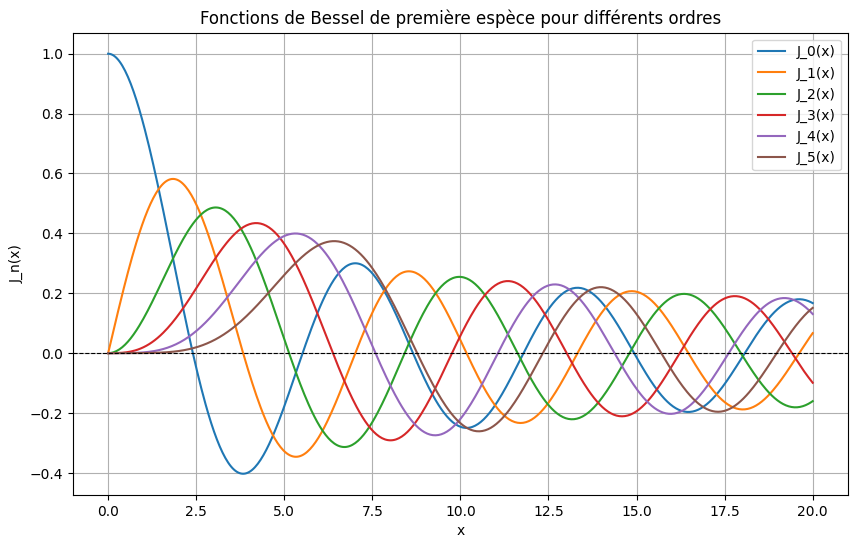

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv  # Fonction de Bessel de première espèce

# Paramètres
x = np.linspace(0, 20, 500)  # Intervalle pour l'axe des x
orders = np.arange(0, 6)     # Ordres des fonctions de Bessel à tracer

# Tracé des fonctions de Bessel
plt.figure(figsize=(10, 6))

for n in orders:
    plt.plot(x, jv(n, x), label=f"J_{n}(x)")

# Configuration du graphique
plt.title("Fonctions de Bessel de première espèce pour différents ordres")
plt.xlabel("x")
plt.ylabel("J_n(x)")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Ligne de référence
plt.legend()
plt.grid(True)
plt.show()

Le graphique généré affiche plusieurs courbes représentant les fonctions de Bessel $J_n(x)$ pour $n = 0, 1, 2, 3, 4, 5$. Vous observerez que :

- Pour $n = 0$, $J_0(x)$ commence à une valeur maximale à $x = 0$.
- Pour $n > 0$, les fonctions $J_n(x)$ commencent à $0$ et oscillent avec une amplitude décroissante.


En modulation FM :

- L’indice de modulation $\beta$ détermine l’énergie distribuée entre les différentes composantes spectrales.
- Chaque amplitude relative est donnée par $J_n(\beta)$, où $n$ est l’ordre harmonique.

# $\textbf{Modulation Numérique}$

## $\textbf{Modulations Binaires ASK, FSK et PSK}$

Cette section illustre trois techniques de modulation binaire : **ASK**, **FSK**, et **PSK**. Ces méthodes permettent de transmettre une séquence binaire en modulant une porteuse en fonction des informations contenues dans les bits.

---
### Paramètres interactifs

- **Séquence binaire** : Définissez une séquence de bits
- **Fréquence de la porteuse $(f_c)$** : Ajuste la fréquence de la porteuse utilisée pour la modulation

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def generate_binary_signal(bit_sequence, bit_rate, fs):
    """
    Génère un signal binaire (NRZ) à partir d'une séquence de bits.

    bit_sequence : séquence binaire (array de 0 et 1)
    bit_rate     : débit binaire (bits par seconde)
    fs           : fréquence d'échantillonnage (Hz)

    Retour : signal binaire, vecteur temps
    """
    Tb = 1 / bit_rate
    num_bits = len(bit_sequence)
    N = int(num_bits * Tb * fs)
    t = np.arange(N) / fs
    binary_signal = np.zeros(N)
    samples_per_bit = int(Tb * fs)
    for i, bit in enumerate(bit_sequence):
        start = i * samples_per_bit
        end = (i + 1) * samples_per_bit
        binary_signal[start:end] = bit
    return binary_signal, t

def ask_modulation(bit_sequence, fc, fs, bit_rate, amp_one=1.0, amp_zero=0.0):
    """
    Modulation ASK (Amplitude Shift Keying).
    """
    Tb = 1 / bit_rate
    N = int(len(bit_sequence) * Tb * fs)
    t = np.arange(N) / fs
    ask_signal = np.zeros(N)
    samples_per_bit = int(Tb * fs)
    for i, bit in enumerate(bit_sequence):
        start = i * samples_per_bit
        end = (i + 1) * samples_per_bit
        if bit == 1:
            ask_signal[start:end] = amp_one * np.cos(2 * np.pi * fc * t[start:end])
        else:
            ask_signal[start:end] = amp_zero * np.cos(2 * np.pi * fc * t[start:end])
    return ask_signal, t

def fsk_modulation(bit_sequence, fc, fs, bit_rate, freq_sep=2.0):
    """
    Modulation FSK (Frequency Shift Keying).
    """
    Tb = 1 / bit_rate
    N = int(len(bit_sequence) * Tb * fs)
    t = np.arange(N) / fs
    fsk_signal = np.zeros(N)
    samples_per_bit = int(Tb * fs)
    f1 = fc + freq_sep
    f0 = fc - freq_sep
    for i, bit in enumerate(bit_sequence):
        start = i * samples_per_bit
        end = (i + 1) * samples_per_bit
        if bit == 1:
            fsk_signal[start:end] = np.cos(2 * np.pi * f1 * t[start:end])
        else:
            fsk_signal[start:end] = np.cos(2 * np.pi * f0 * t[start:end])
    return fsk_signal, t

def psk_modulation(bit_sequence, fc, fs, bit_rate):
    """
    Modulation PSK (Phase Shift Keying).
    """
    Tb = 1 / bit_rate
    N = int(len(bit_sequence) * Tb * fs)
    t = np.arange(N) / fs
    psk_signal = np.zeros(N)
    samples_per_bit = int(Tb * fs)
    for i, bit in enumerate(bit_sequence):
        start = i * samples_per_bit
        end = (i + 1) * samples_per_bit
        if bit == 1:
            phase = 0
        else:
            phase = np.pi
        psk_signal[start:end] = np.cos(2 * np.pi * fc * t[start:end] + phase)
    return psk_signal, t

def interactive_modulation(sequence, fc):
    """
    Fonction interactive pour visualiser les modulations ASK, FSK et PSK.
    """
    fs = 1000  # Fréquence d'échantillonnage
    bit_rate = 1.0  # Débit binaire (fixé à 1 bit/s)

    # Convertir la séquence de bits en array
    bit_sequence = np.array([int(b) for b in sequence])

    # Générer le signal binaire
    binary_signal, t = generate_binary_signal(bit_sequence, bit_rate, fs)

    # Générer les signaux modulés
    ask_signal, _ = ask_modulation(bit_sequence, fc, fs, bit_rate)
    fsk_signal, _ = fsk_modulation(bit_sequence, fc, fs, bit_rate)
    psk_signal, _ = psk_modulation(bit_sequence, fc, fs, bit_rate)

    # Afficher les modulations
    plt.figure(figsize=(12, 8))

    # ASK
    plt.subplot(3, 1, 1)
    plt.plot(t, ask_signal, 'b')
    plt.title("Modulation ASK")
    plt.grid(True)
    plt.xlim(0, len(bit_sequence) / bit_rate)

    # FSK
    plt.subplot(3, 1, 2)
    plt.plot(t, fsk_signal, 'r')
    plt.title("Modulation FSK")
    plt.grid(True)
    plt.xlim(0, len(bit_sequence) / bit_rate)

    # PSK
    plt.subplot(3, 1, 3)
    plt.plot(t, psk_signal, 'g')
    plt.title("Modulation PSK")
    plt.grid(True)
    plt.xlim(0, len(bit_sequence) / bit_rate)

    plt.tight_layout()
    plt.show()

# Widgets interactifs
interact(
    interactive_modulation,
    sequence=widgets.Text(value="10110100", description="Bits:"),
    fc=widgets.FloatSlider(value=5, min=2, max=20, step=1, description="Carrier freq:")
)

interactive(children=(Text(value='10110100', description='Bits:'), FloatSlider(value=5.0, description='Carrier…

<function __main__.interactive_modulation(sequence, fc)>